<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Data

This notebook demonstrates handling missing data in a DataFrame.

### Key Steps:
1. **Create Sample Data**: Simulating missing data in a DataFrame.
2. **Visualize Missing Data**: Heatmap shows missing values before imputation.
3. **Impute Missing Data**: Fill missing values using column means.
4. **Post-Imputation Visualization**: Heatmap shows data after filling.

Libraries used: `pandas`, `numpy`, `matplotlib`, `seaborn`.


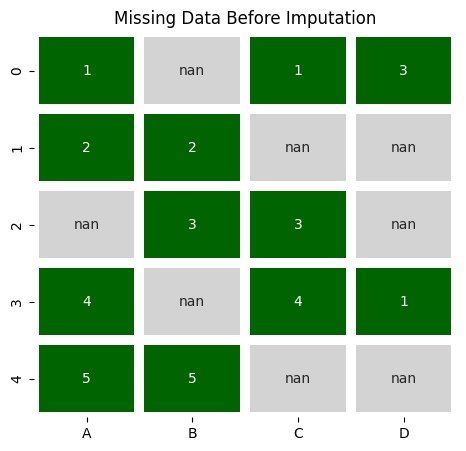

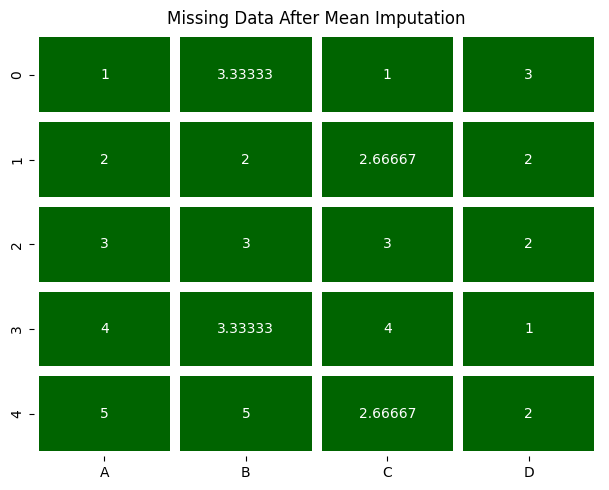

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame with missing data
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, np.nan, 3, 4, np.nan],
    'D': [3, np.nan, np.nan, 1, np.nan]
}
df = pd.DataFrame(data)

# Create a custom colormap
colors = ['#006400', '#D3D3D3']  # Blue for missing, Gray for non-missing
cmap = sns.color_palette(colors, as_cmap=True)

# Plot missing data before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cmap=cmap, cbar=False, linewidths=6, linecolor='white', annot=df.values, fmt='g')
plt.title('Missing Data Before Imputation')

plt.figure(figsize=(12, 5))

# Fill missing values with the mean
df_imputed = df.fillna(df.mean())

# Plot data after imputation
plt.subplot(1, 2, 1)
sns.heatmap(df_imputed.isnull(), cmap=cmap, cbar=False, linewidths=6, linecolor='white', annot=df_imputed.values, fmt='g')
plt.title('Missing Data After Mean Imputation')

plt.tight_layout()
plt.show()


# Noise and Outliers in Data

In this notebook, we explore the concepts of **noise** and **outliers** in data using a sine wave as an example.

### Noise
- **Definition**: Noise refers to random variations or fluctuations in the data that deviate from the true signal. Noise is inherent in real-world data and often makes patterns harder to discern.
- **Example**: We added random noise to a clean sine wave, simulating real-world imperfections. This is visualized in the "Sine Wave with Added Noise" plot.

### Outliers
- **Definition**: Outliers are data points that differ significantly from other observations. They can result from errors, variability in measurements, or rare events.
- **Example**: Two outliers were introduced into the noisy sine wave, one positive and one negative, and are shown in red in the "Sine Wave with Noise and Outliers" plot.

By visualizing both noise and outliers, we can see how they affect data and why it's important to handle them carefully in machine learning tasks.


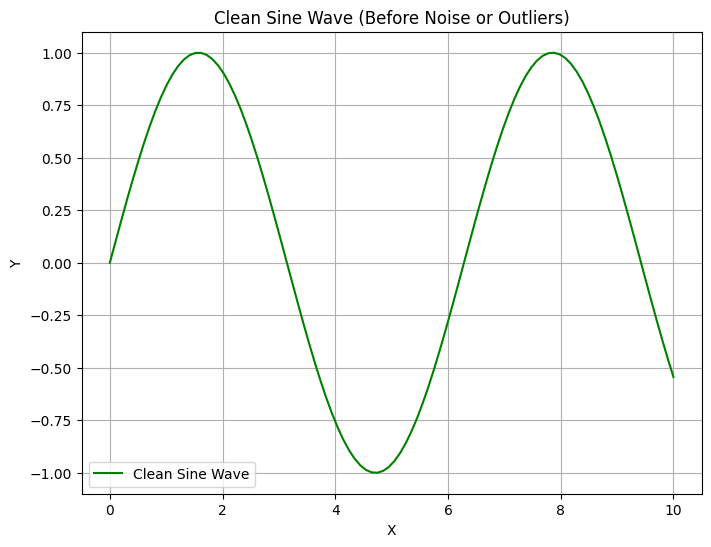

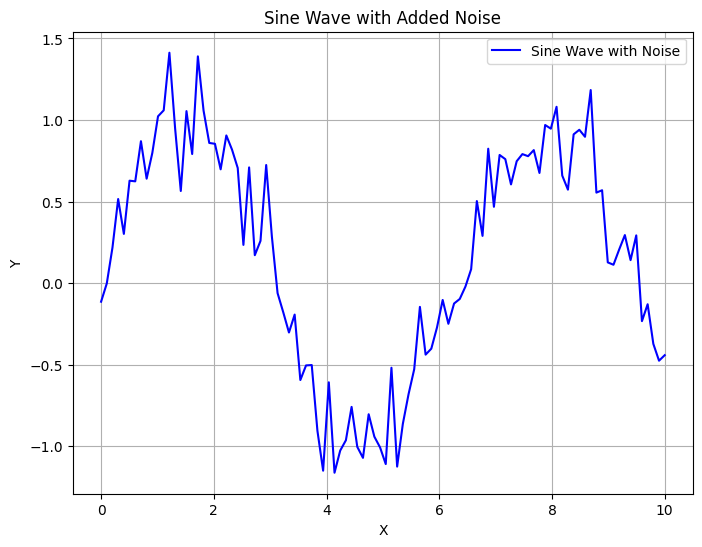

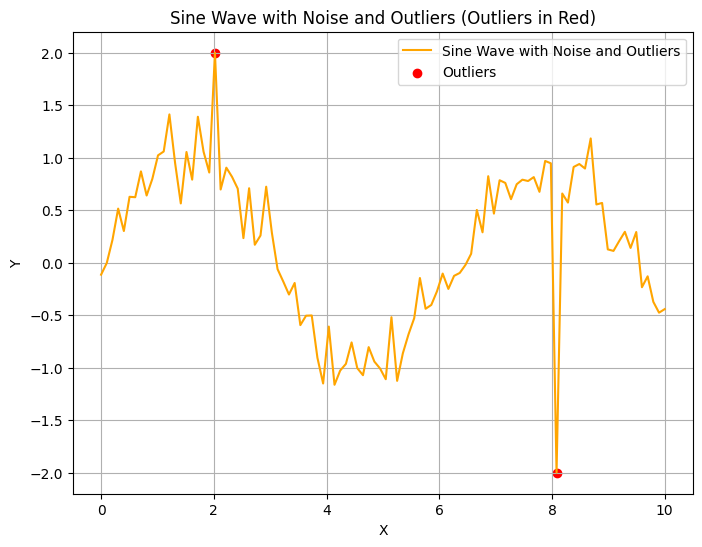

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 10
x = np.linspace(0, 10, 100)

# Generate clean sine wave values
y_clean = np.sin(x)

# Generate noisy sine wave (noise added)
y_noisy = y_clean + np.random.normal(0, 0.2, 100)

# Add outliers to the noisy data
y_noisy_with_outliers = y_noisy.copy()
y_noisy_with_outliers[20] = 2.0  # Positive outlier
y_noisy_with_outliers[80] = -2.0  # Negative outlier

# Plot clean sine wave
plt.figure(figsize=(8, 6))
plt.plot(x, y_clean, label='Clean Sine Wave', color='green')
plt.title('Clean Sine Wave (Before Noise or Outliers)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot sine wave with noise
plt.figure(figsize=(8, 6))
plt.plot(x, y_noisy, label='Sine Wave with Noise', color='blue')
plt.title('Sine Wave with Added Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot sine wave with noise and outliers
plt.figure(figsize=(8, 6))
plt.plot(x, y_noisy_with_outliers, label='Sine Wave with Noise and Outliers', color='orange')
plt.scatter([x[20], x[80]], [y_noisy_with_outliers[20], y_noisy_with_outliers[80]], color='red', marker='o', label='Outliers')
plt.title('Sine Wave with Noise and Outliers (Outliers in Red)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# Clustering to Handle Outliers

Clustering can be an effective method for detecting and handling outliers in datasets. By grouping similar data points together into clusters, we can identify those points that do not belong to any cluster or are significantly distant from the cluster centers, potentially marking them as outliers.

### Process:
- **K-Means Clustering**: We applied K-Means clustering to a dataset with three clusters and some manually added outliers.
- **Detecting Outliers**: After clustering, distances between each data point and its corresponding cluster center were calculated. Data points with distances exceeding a certain threshold (95th percentile) were flagged as potential outliers.
- **Visualization**:
    - The  plot highlights potential outliers in black, indicating points that lie far from their respective clusters.

This approach demonstrates how clustering techniques can be used to identify and manage outliers in various datasets.


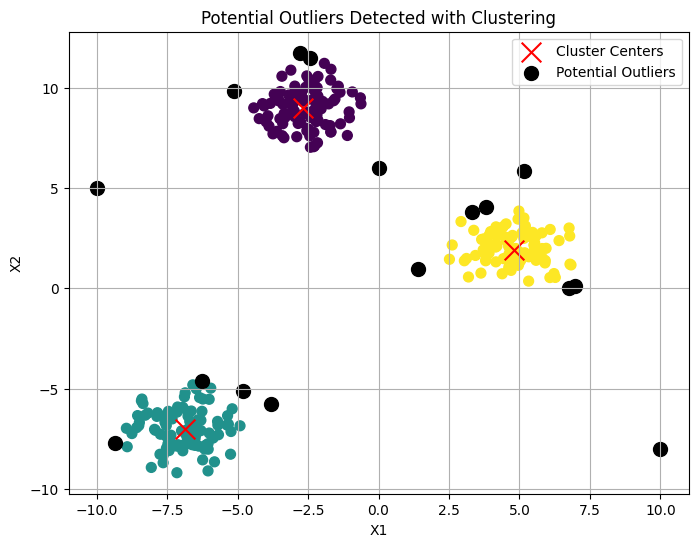

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings

# Suppress any warnings
warnings.filterwarnings("ignore")

# Generate synthetic data with three clusters and outliers
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.array([[10, -8], [0, 6], [-10, 5]])  # Add some outliers
X = np.vstack((X, outliers))

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict cluster labels for each data point
labels = kmeans.predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_


# Detect potential outliers (data points far from cluster centers)
distances = np.linalg.norm(X - centers[labels], axis=1)
outlier_threshold = np.percentile(distances, 95)  # Adjust the percentile as needed
potential_outliers = X[distances > outlier_threshold]

# Plot potential outliers in a separate plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.scatter(potential_outliers[:, 0], potential_outliers[:, 1], c='black', marker='o', s=100, label='Potential Outliers')
plt.title('Potential Outliers Detected with Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


# Anomaly Detection in IoT Sensor Data using Clustering

In this example, we simulate IoT sensor readings from multiple devices and use K-Means clustering to detect potential anomalies (outliers) that might indicate sensor malfunction or unusual activity.

### Key Steps:
1. **Simulated IoT Sensor Data**: We generated synthetic sensor data with normal readings and a few anomalous readings to simulate unusual behavior.
2. **K-Means Clustering**: K-Means was used to group the sensor data into clusters representing normal behavior. Sensor readings significantly different from the cluster centers were flagged as anomalies.
3. **Anomaly Detection**: We calculated the distance of each sensor reading from its assigned cluster center and classified readings beyond the 95th percentile as potential anomalies.

### Visualization:
- **Anomalies**: The  plot identifies potential anomalies, which are marked in black and represent sensor readings that deviate significantly from normal behavior.

This approach is commonly used in real-world applications for anomaly detection in IoT systems, where detecting unusual patterns early can prevent system failures or detect malfunctions.


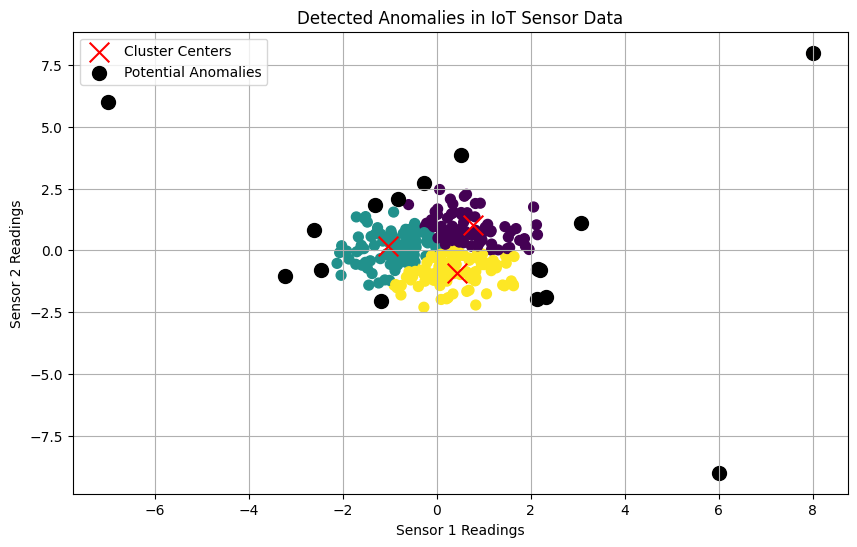

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Simulate IoT sensor data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(300, 2))  # Normal sensor data (300 samples, 2 sensors)
anomalies = np.array([[8, 8], [-7, 6], [6, -9]])  # Anomalous sensor readings (outliers)

# Combine normal data with anomalies
sensor_data = np.vstack([normal_data, anomalies])

# Convert to DataFrame for real-world context
df_sensor = pd.DataFrame(sensor_data, columns=["Sensor 1", "Sensor 2"])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_sensor)

# Predict cluster labels
labels = kmeans.predict(df_sensor)

# Cluster centers
centers = kmeans.cluster_centers_

# Calculate distances from cluster centers to identify potential anomalies
distances = np.linalg.norm(df_sensor - centers[labels], axis=1)
outlier_threshold = np.percentile(distances, 95)  # Set threshold for outliers (95th percentile)
potential_outliers = df_sensor[distances > outlier_threshold]


# Plot anomalies (potential outliers)
plt.figure(figsize=(10, 6))
plt.scatter(df_sensor["Sensor 1"], df_sensor["Sensor 2"], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.scatter(potential_outliers["Sensor 1"], potential_outliers["Sensor 2"], c='black', marker='o', s=100, label='Potential Anomalies')
plt.title('Detected Anomalies in IoT Sensor Data')
plt.xlabel('Sensor 1 Readings')
plt.ylabel('Sensor 2 Readings')
plt.legend()
plt.grid(True)
plt.show()


# Box Plot for Outlier Detection

Box plots are an effective way to visually detect outliers in a dataset. Outliers appear as points outside the "whiskers" of the box, which represent the range of the majority of the data.

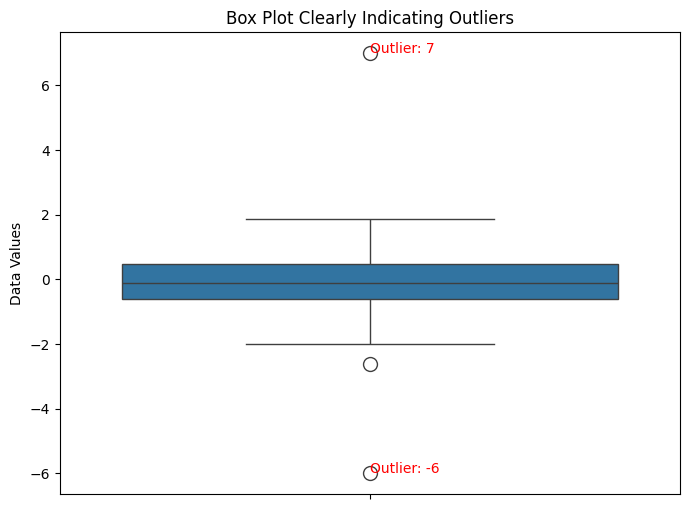

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data with some outliers
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)
data_with_outliers = np.append(data, [7, -6])  # Adding outliers

# Create a box plot with clear markers for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_with_outliers, flierprops=dict(marker='o', color='red', markersize=10))
plt.title('Box Plot Clearly Indicating Outliers')
plt.ylabel('Data Values')

# Annotating the outliers for clarity
for outlier in [7, -6]:
    plt.text(0, outlier, f'Outlier: {outlier}', horizontalalignment='left', size='medium', color='red')

plt.show()


# Feature Engineering in Python

This code demonstrates four essential **Feature Engineering** techniques:

1. **Mathematical Transformation**:
   - Created the `Credit to Income Ratio` by dividing the `Credit Score` by `Annual Income`.

2. **Interaction Features**:
   - Generated the `Income * Age` feature by multiplying `Annual Income` and `Age` to capture their combined effect.

3. **Binning**:
   - Grouped the `Age` feature into categorical bins (`Age Group`) such as 18-30, 31-40, etc.

4. **Date/Time Feature**:
   - Calculated the `Days Since Purchase` by subtracting the `Date of Purchase` from the current date, extracting useful information from the date field.

These techniques help transform raw data into more meaningful features for machine learning models.


In [13]:
import pandas as pd
import numpy as np

# Sample Data
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30],
    'Date of Purchase': pd.to_datetime(['2022-01-10', '2021-12-01', '2020-05-15', '2023-04-03', '2022-07-07', '2021-09-20'])
}

df = pd.DataFrame(data)

# 1. Mathematical Transformation: Credit to Income Ratio
df['Credit to Income Ratio'] = df['Credit Score'] / df['Annual Income']

# 2. Interaction Feature: Income multiplied by Age
df['Income * Age'] = df['Annual Income'] * df['Age']

# 3. Binning: Group Age into categories
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 4. Date/Time Feature: Days since last purchase
current_date = pd.to_datetime('2024-09-01')
df['Days Since Purchase'] = (current_date - df['Date of Purchase']).dt.days

# Display the DataFrame
print(df)



   Credit Score  Annual Income  Age Date of Purchase  Credit to Income Ratio  \
0           720          60000   25       2022-01-10                0.012000   
1           650          45000   35       2021-12-01                0.014444   
2           780          75000   45       2020-05-15                0.010400   
3           600          30000   23       2023-04-03                0.020000   
4           700          80000   50       2022-07-07                0.008750   
5           680          55000   30       2021-09-20                0.012364   

   Income * Age Age Group  Days Since Purchase  
0       1500000     18-30                  965  
1       1575000     31-40                 1005  
2       3375000     41-50                 1570  
3        690000     18-30                  517  
4       4000000     51-60                  787  
5       1650000     31-40                 1077  


# Feature Scaling: Standardization and Normalization

This code demonstrates two common feature scaling methods: **Standardization** and **Normalization**.

### Methods:

1. **Standardization**:
   - Scales data to have a mean of 0 and a standard deviation of 1.
   - Useful when features follow a normal distribution.

2. **Normalization**:
   - Scales data to a fixed range, typically [0, 1].
   - Helpful when features have varying scales.

### Visualizations:
- **Box plots** are shown to compare the distribution of the original data, standardized data, and normalized data, illustrating how the scales change while preserving the underlying structure of the data.


Standardized Data:
   Credit Score  Annual Income       Age
0      0.564467       0.146911 -0.972082
1     -0.683302      -0.734553  0.033520
2      1.633984       1.028374  1.039122
3     -1.574566      -1.616017 -1.173203
4      0.207962       1.322196  1.541924
5     -0.148544      -0.146911 -0.469281

Normalized Data:
   Credit Score  Annual Income       Age
0      0.666667            0.6  0.074074
1      0.277778            0.3  0.444444
2      1.000000            0.9  0.814815
3      0.000000            0.0  0.000000
4      0.555556            1.0  1.000000
5      0.444444            0.5  0.259259


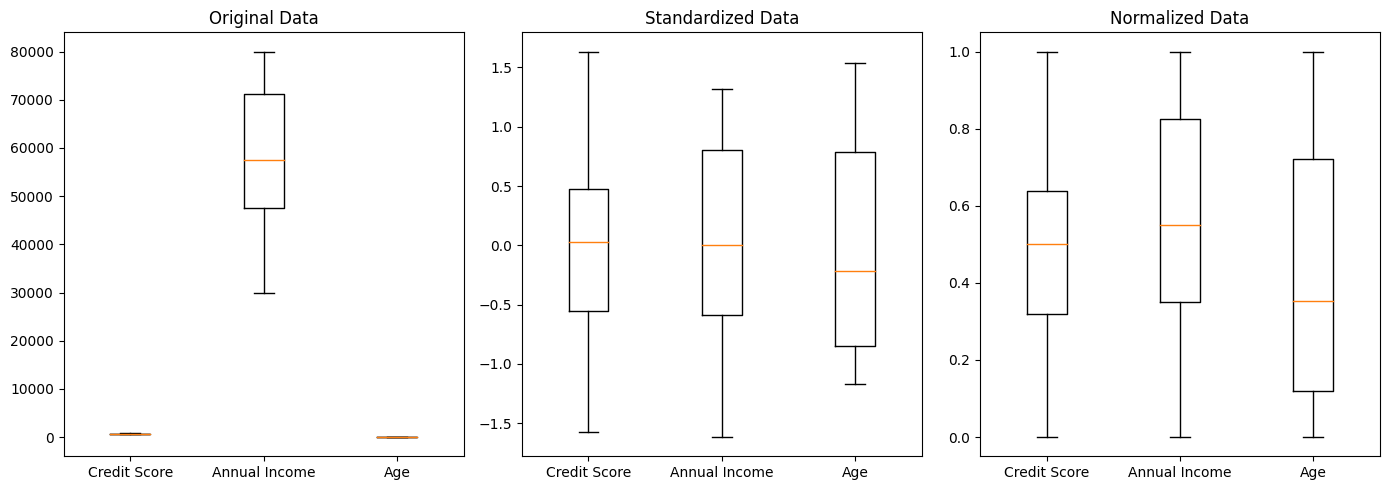

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30]
}
df = pd.DataFrame(data)

# 1. Standardization (Z-score scaling)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# 2. Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Display both standardized and normalized data
print("Standardized Data:")
print(df_standardized)

print("\nNormalized Data:")
print(df_normalized)

# Plot original vs standardized vs normalized data for comparison
plt.figure(figsize=(14, 5))

# Plot original data
plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.boxplot([df['Credit Score'], df['Annual Income'], df['Age']], labels=df.columns)

# Plot standardized data
plt.subplot(1, 3, 2)
plt.title("Standardized Data")
plt.boxplot([df_standardized['Credit Score'], df_standardized['Annual Income'], df_standardized['Age']], labels=df_standardized.columns)

# Plot normalized data
plt.subplot(1, 3, 3)
plt.title("Normalized Data")
plt.boxplot([df_normalized['Credit Score'], df_normalized['Annual Income'], df_normalized['Age']], labels=df_normalized.columns)

plt.tight_layout()
plt.show()


# Filter Methods: Correlation-Based Feature Selection

### Method: Pearson Correlation Coefficient
- **Pearson Correlation** measures the linear relationship between two variables, ranging from -1 to 1:
  - **1**: Perfect positive correlation.
  - **0**: No correlation.
  - **-1**: Perfect negative correlation.
  
### Process:
1. We calculate the correlation between each feature and the target variable (`Loan Approval`).
2. Features with high correlation values are selected for further use in the model.

### Key Insight:
- In our dataset, **Credit Score** and **Annual Income** show strong positive correlations with **Loan Approval** (correlation > 0.5). These features are important for predicting loan approval, while **Age** has a weaker correlation and can be deprioritized.


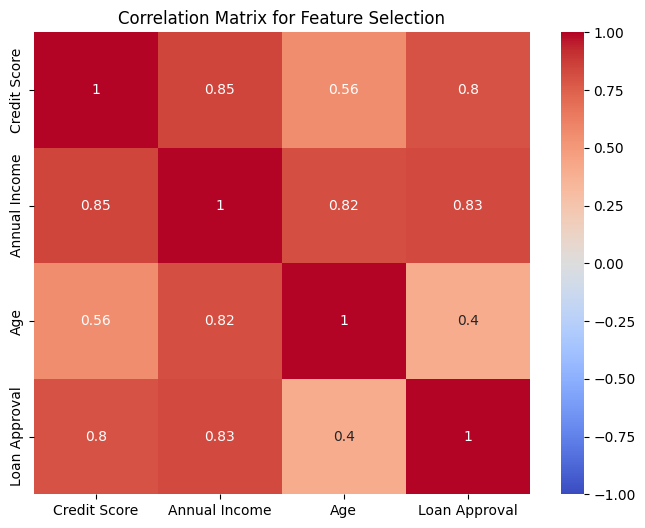

Selected Features Based on Correlation:
['Loan Approval', 'Annual Income', 'Credit Score']


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with a target variable
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30],
    'Loan Approval': [1, 0, 1, 0, 1, 1]  # Target variable
}

df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr(method='pearson')  # Pearson Correlation

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Feature Selection')
plt.show()

# Filter based on correlation threshold (example: correlation > 0.5)
selected_features = corr_matrix['Loan Approval'].abs().sort_values(ascending=False)
print("Selected Features Based on Correlation:")
print(selected_features[selected_features > 0.5].index.tolist())



# Wrapper Methods for Feature Selection

**Definition**: Wrapper methods select features by testing different combinations and evaluating model performance. They aim to find the optimal subset of features.

## Key Approaches:

1. **Recursive Feature Elimination (RFE)**:
   - Iteratively removes the least important features based on model performance.
   - Used with models like Logistic Regression, Decision Trees.

2. **Forward Feature Selection**:
   - Starts with no features and adds one feature at a time, selecting the one that improves performance the most.

3. **Backward Feature Elimination**:
   - Starts with all features and removes the least important feature in each step, stopping when performance worsens.

4. **Exhaustive Feature Selection**:
   - Tests all possible combinations of features and selects the subset with the best model performance.
   - Computationally expensive but thorough.

## Steps:
1. Train a model with all, no, or random features.
2. Add, remove, or select features based on performance.
3. Repeat until the best subset is found.

**Goal**: Simplify the model, improve accuracy, and avoid overfitting by selecting only the most relevant features.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Independent variables and target
X = df[['Credit Score', 'Annual Income', 'Age']]
y = df['Loan Approval']

# Logistic Regression model
model = LogisticRegression()

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(X, y)

# Display RFE results
print("Selected Features: ", X.columns[rfe.support_])
print("Feature Ranking: ", rfe.ranking_)


Selected Features:  Index(['Credit Score', 'Age'], dtype='object')
Feature Ranking:  [1 2 1]


# Embedded Methods for Feature Selection

**Definition**: Embedded methods perform feature selection during model training, integrating the process into the model construction itself.

## Key Approaches:

1. **Lasso Regression (L1 Regularization)**:
   - Adds a penalty to the model’s cost function, reducing the coefficients of less important features to zero.
   - Used with linear models, automatically selecting the most relevant features.

2. **Decision Trees**:
   - Automatically ranks features based on their contribution to reducing uncertainty (e.g., Information Gain or Gini Index).
   - Used in decision trees and ensemble methods like Random Forests.

3. **Elastic Net**:
   - Combines L1 (Lasso) and L2 (Ridge) regularization, balancing feature selection and coefficient shrinkage.
   - Used for linear models, selecting features while shrinking less important ones.

## Steps:
1. Train the model using methods like Lasso or Decision Trees.
2. Feature importance is learned during training.
3. Automatically removes or penalizes irrelevant features.

## Example:
In a dataset predicting **Loan Approval**, Lasso Regression penalizes less important features like **Annual Income**, reducing their coefficients to zero, while retaining important ones like **Credit Score**.

**Advantages**:
- **Automatic**: Feature selection happens during model training.
- **Efficient**: Simultaneously selects features and builds the model.
- **Integrated**: Reduces computational overhead by incorporating feature selection into the model.


         Feature  Coefficient
0   Credit Score     0.101607
1  Annual Income     0.205285
2            Age    -0.000000


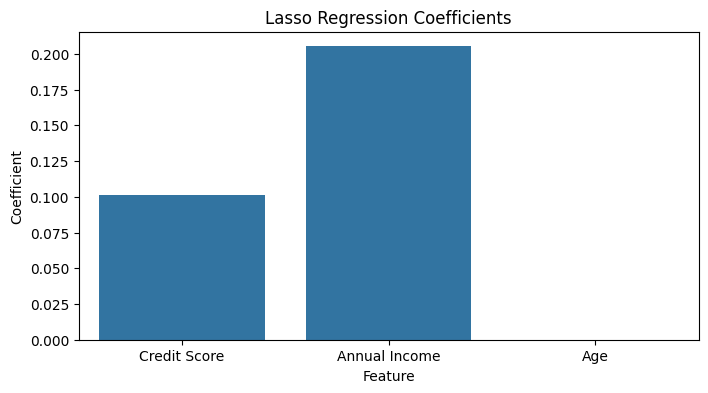

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Display the feature coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print(lasso_coefficients)

# Visualize the coefficients
plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Coefficient', data=lasso_coefficients)
plt.title('Lasso Regression Coefficients')
plt.show()


# Supervised Learning - Linear Regression

### Problem: Predicting Energy Consumption

Given temperature data (°C), the goal is to predict **energy consumption** (kWh). We aim to model the relationship between temperature and energy usage.

### Solution: Linear Regression

We apply **Linear Regression** to fit a line that best predicts energy consumption based on temperature. The model captures how energy consumption changes with temperature, enabling accurate predictions for new data.


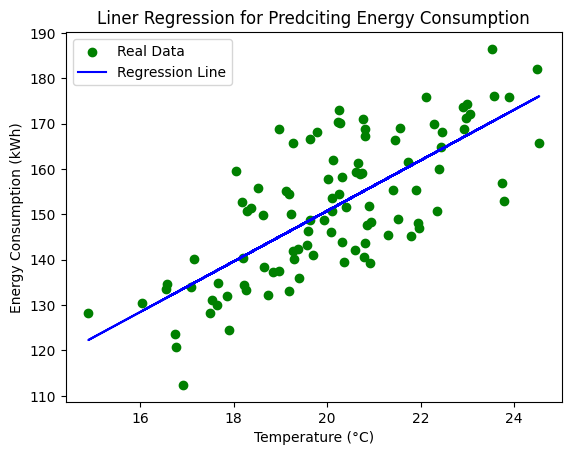

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data resembling a real-world scenario
np.random.seed(0)

# Simulated input variable (e.g., temperature in Celsius)
X = 20 + 2 * np.random.randn(100)

# Simulated output variable (e.g., energy consumption)
# This data represents a scenario where energy consumption is related to temperature
y = 50 + 5 * X + 10 * np.random.randn(100)

# Fit a linear regression model (or any other appropriate model)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Plot the synthetic data points and regression line
plt.scatter(X, y, label='Real Data', color='g')
plt.plot(X, model.predict(X.reshape(-1, 1)), label='Regression Line', color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Liner Regression for Predciting Energy Consumption')
plt.legend()
plt.show()

# Supervised Learning - Polynomial Regression

### Problem: Estimating Healthcare Costs

The goal is to estimate patient **healthcare costs** based on features like **age** and **BMI**, where the relationship is non-linear (e.g., healthcare costs increase at a higher rate for older patients with higher BMI).

### Solution: Polynomial Regression

We apply **Polynomial Regression** to capture the non-linear relationship between patient age, BMI, and healthcare costs. This approach allows us to model how healthcare costs grow at an accelerated rate with certain patient attributes, providing a more accurate estimate of resource needs.



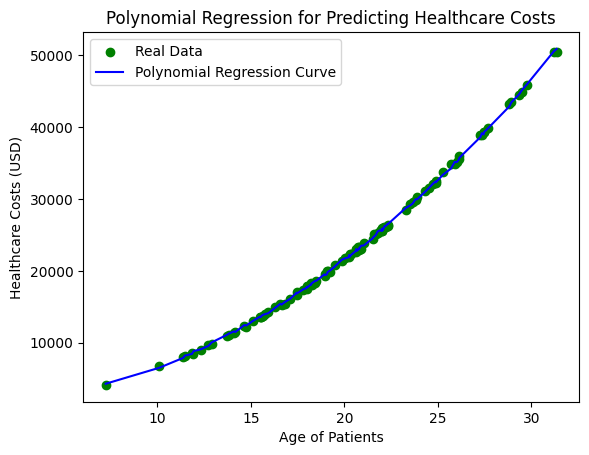

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic non-linear data (age, BMI, and pre-existing conditions affecting healthcare cost)
np.random.seed(0)
X = 20 + 5 * np.random.randn(100)  # Age of patients
BMI = 18 + 4 * np.random.randn(100)  # BMI of patients
y = 1000 + 50 * X**2 + 30 * BMI + 100 * np.random.randn(100)  # Non-linear healthcare costs

# Transform input data into polynomial features (degree 2 for age)
X_combined = np.column_stack((X, BMI))  # Combine age and BMI as input features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_combined)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Plot the data points (age vs cost) and the polynomial regression curve
plt.scatter(X, y, label='Real Data', color='g')
X_sorted = np.sort(X)
plt.plot(X_sorted, model.predict(poly.transform(np.column_stack((X_sorted, BMI)))), label='Polynomial Regression Curve', color='b')
plt.xlabel('Age of Patients')
plt.ylabel('Healthcare Costs (USD)')
plt.title('Polynomial Regression for Predicting Healthcare Costs')
plt.legend()
plt.show()



# Supervised Learning - Logistic Regression

### Problem: Classifying Loan Approvals

The goal is to predict whether a **loan will be approved** (binary classification: approved = 1, not approved = 0) based on applicant data such as **credit score**.

### Solution: Logistic Regression

We apply **Logistic Regression** to model the probability of loan approval based on features like credit score. The model provides the likelihood of approval, making it a suitable choice for classification problems.


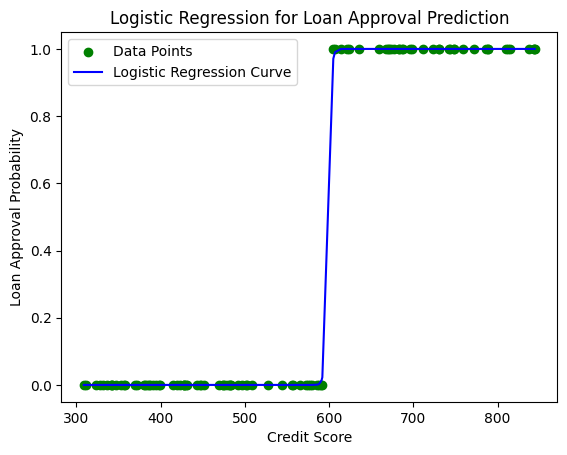

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Simulate data for credit score and loan approval (1 = Approved, 0 = Not Approved)
np.random.seed(0)
X = np.random.randint(300, 850, 100).reshape(-1, 1)  # Credit score
y = (X > 600).astype(int).ravel()  # Loan approval based on credit score threshold

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Sort the values for smooth plotting
X_sorted = np.sort(X, axis=0)
y_proba = model.predict_proba(X_sorted)[:, 1]  # Predicted probabilities

# Plot the data points and logistic regression curve
plt.scatter(X, y, color='g', label='Data Points')
plt.plot(X_sorted, y_proba, label='Logistic Regression Curve', color='b')
plt.xlabel('Credit Score')
plt.ylabel('Loan Approval Probability')
plt.title('Logistic Regression for Loan Approval Prediction')
plt.legend()
plt.show()



# Logistic Functions: Sigmoid, Softmax, and Tanh

### 1. Sigmoid Logistic Regression:
- **Description**: The sigmoid function is used for **binary classification**, outputting probabilities between 0 and 1. In this case, we predict whether a loan will be approved based on the applicant's credit score.
- **Plot**: Shows how the probability of loan approval increases with the credit score, following an S-shaped curve.

### 2. Softmax Logistic Regression (Multinomial):
- **Description**: The softmax function is used for **multiclass classification**, where the model assigns probabilities to each class (e.g., low, medium, high credit score classes). The sum of probabilities across all classes equals 1.
- **Plot**: Displays how the model predicts probabilities for different classes based on credit score.

### 3. Hyperbolic Tangent (Tanh) Transformation:
- **Description**: The **tanh** function is a non-linear activation function that outputs values between \(-1\) and 1. It is applied to the sigmoid output to transform the probability range.
- **Plot**: Shows how the tanh function transforms the sigmoid probabilities into the \([-1, 1]\) range.


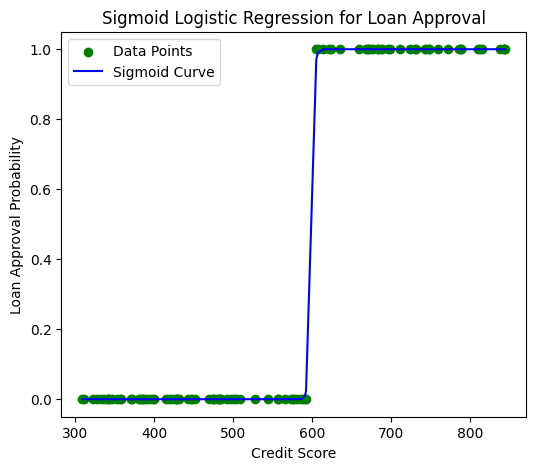

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


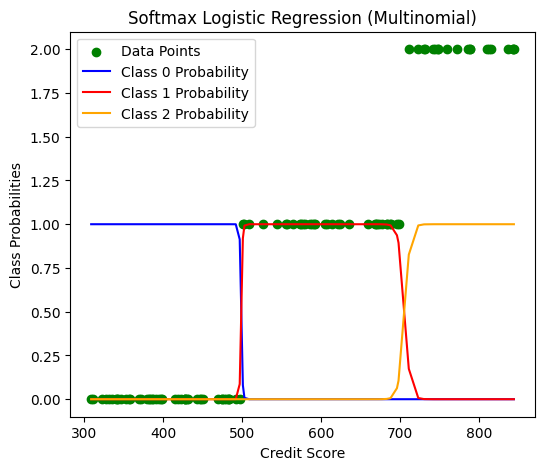

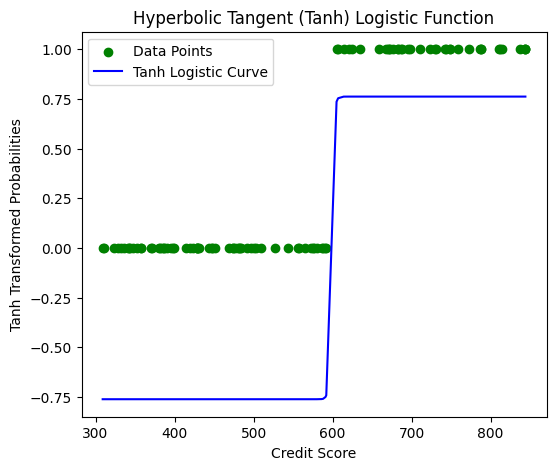

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Simulate data for credit score and loan approval (1 = Approved, 0 = Not Approved)
np.random.seed(0)
X = np.random.randint(300, 850, 100).reshape(-1, 1)  # Credit score
y_binary = (X > 600).astype(int).ravel()  # Binary outcome (Sigmoid)

# Sigmoid Logistic Regression (Binary)
model_sigmoid = LogisticRegression()
model_sigmoid.fit(X, y_binary)

# Sort values for smooth plotting
X_sorted = np.sort(X, axis=0)
y_sigmoid_proba = model_sigmoid.predict_proba(X_sorted)[:, 1]  # Sigmoid probabilities

# Plot Sigmoid Logistic Regression (Binary)
plt.figure(figsize=(6, 5))
plt.scatter(X, y_binary, color='g', label='Data Points')
plt.plot(X_sorted, y_sigmoid_proba, label='Sigmoid Curve', color='b')
plt.xlabel('Credit Score')
plt.ylabel('Loan Approval Probability')
plt.title('Sigmoid Logistic Regression for Loan Approval')
plt.legend()
plt.show()

# Simulate multi-class data for Softmax (Multinomial Logistic Regression)
y_multiclass = np.digitize(X, bins=[500, 700])  # Three classes based on credit score

# Softmax Logistic Regression (Multinomial)
model_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_softmax.fit(X, y_multiclass)

# Get softmax probabilities for each class
y_softmax_proba = model_softmax.predict_proba(X_sorted)

# Plot Softmax Logistic Regression (Multinomial)
plt.figure(figsize=(6, 5))
plt.scatter(X, y_multiclass, color='g', label='Data Points')
plt.plot(X_sorted, y_softmax_proba[:, 0], label='Class 0 Probability', color='b')
plt.plot(X_sorted, y_softmax_proba[:, 1], label='Class 1 Probability', color='r')
plt.plot(X_sorted, y_softmax_proba[:, 2], label='Class 2 Probability', color='orange')
plt.xlabel('Credit Score')
plt.ylabel('Class Probabilities')
plt.title('Softmax Logistic Regression (Multinomial)')
plt.legend()
plt.show()

# Apply Hyperbolic Tangent (Tanh) function on Sigmoid output using np.tanh
y_tanh = np.tanh(y_sigmoid_proba * 2 - 1)  # Manually apply Tanh on the probabilities

# Plot Tanh Transformation
plt.figure(figsize=(6, 5))
plt.scatter(X, y_binary, color='g', label='Data Points')
plt.plot(X_sorted, y_tanh, label='Tanh Logistic Curve', color='b')
plt.xlabel('Credit Score')
plt.ylabel('Tanh Transformed Probabilities')
plt.title('Hyperbolic Tangent (Tanh) Logistic Function')
plt.legend()
plt.show()




# ID3 Decision Tree for Medical Diagnosis

This code demonstrates the implementation of the ID3 algorithm for a simple medical diagnosis problem using `DecisionTreeClassifier` from `sklearn`. It covers the following steps:

## 1. Dataset Creation
The dataset includes three categorical features: `Fever`, `Cough`, and `SoreThroat`, along with the target variable `Diagnosis`, which categorizes medical conditions like:
- `Flu`
- `Infection`
- `Cold`
- `Allergy`
- `Strep`

## 2. Data Preprocessing
The categorical features are converted into numeric codes using `.cat.codes` to make them usable by the decision tree classifier.

## 3. ID3 Classifier
The decision tree is trained using the **entropy criterion** (ID3 algorithm) to split the data based on the features. The classifier is fitted with the encoded features and the target variable.

## 4. Decision Tree Visualization
The decision tree is plotted using `plot_tree` from `sklearn`. The tree is visually represented with filled nodes and rounded corners to display the decision-making process.

## 5. Entropy Calculation
A custom function `calculate_entropy` is defined to compute the entropy of the dataset manually.

- **Initial Entropy**: The initial entropy of the dataset is calculated.
- **Information Gain**: The code iterates through each feature to calculate the entropy after splitting based on feature values and the corresponding information gain. This simulates the steps taken by the ID3 algorithm to select the best features.

## 6. Information Gain Calculation
The information gain for each feature is calculated by comparing the entropy before and after the split. Features with the highest information gain are selected to split the data in the decision tree.


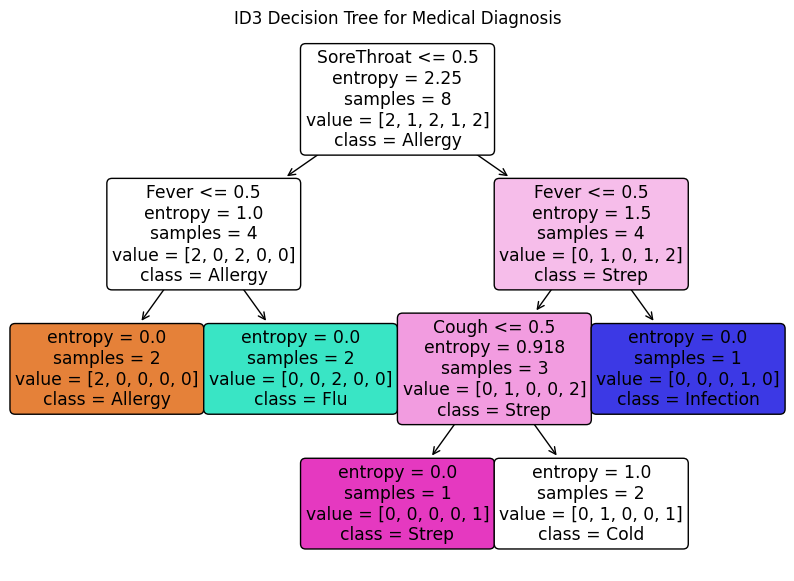

Initial Entropy of the dataset: 2.2500

Information Gain for Fever: 0.9544
Information Gain for Cough: 0.7500
Information Gain for SoreThroat: 1.0000


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from collections import Counter
from math import log2

# Sample dataset
data = {
    'Fever': ['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    'Cough': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    'SoreThroat': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Diagnosis': ['Flu', 'Infection', 'Cold', 'Allergy', 'Strep', 'Flu', 'Strep', 'Allergy']
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df[['Fever', 'Cough', 'SoreThroat']]
y = df['Diagnosis']

# Convert categorical features to numeric codes
X_encoded = X.apply(lambda col: col.astype('category').cat.codes)

# Train ID3 Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_encoded, y)

# Plot the decision tree
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=list(X.columns), class_names=clf.classes_, filled=True, rounded=True)
plt.title("ID3 Decision Tree for Medical Diagnosis")
plt.show()

# Function to calculate entropy
def calculate_entropy(y_values):
    total_count = len(y_values)
    counts = Counter(y_values)
    entropy = 0

    for count in counts.values():
        prob = count / total_count
        entropy -= prob * log2(prob)

    return entropy

# Show the step-by-step ID3 algorithm
initial_entropy = calculate_entropy(y)
print(f"Initial Entropy of the dataset: {initial_entropy:.4f}\n")

# Calculate entropy and information gain for each feature
for feature in X.columns:
    feature_values = X[feature].unique()
    feature_entropy = 0

    for value in feature_values:
        subset_y = y[X[feature] == value]
        entropy = calculate_entropy(subset_y)
        feature_entropy += (len(subset_y) / len(y)) * entropy

    information_gain = initial_entropy - feature_entropy
    print(f"Information Gain for {feature}: {information_gain:.4f}")


## Explanation of Random Forest Decision Tree Visualization

The image represents a visualization of a single decision tree from a **Random Forest Classifier**. Below is an explanation of the different components within each box:

### 1. **Decision Criteria** (e.g., `SoreThroat <= 0.5`)
- Each decision node shows the **feature** used to split the data and the **threshold** used for the decision.
- In this case, features like `SoreThroat` and `Cough` are being used, and the threshold `<= 0.5` refers to an encoded value:
  - `0` means "No" (no sore throat or no cough).
  - `1` means "Yes" (presence of sore throat or cough).
- For example, `SoreThroat <= 0.5` means "Does the patient **not** have a sore throat?"

### 2. **Gini Impurity** (e.g., `gini = 0.5`)
- **Gini impurity** is a measure of how mixed the classes are at a node.
- A **Gini index** of `0` means the node is pure (all samples belong to a single class).
- A higher Gini value (closer to `1`) indicates that the samples are more mixed across classes.

### 3. **Samples** (e.g., `samples = 2`)
- This shows the number of data points (patients) that have reached this node.
- For example, `samples = 2` means that two patients satisfy the decision criteria at this node.

### 4. **Value** (e.g., `value = [1, 0, 1]`)
- The `value` represents the number of data points for each class at this node.
- For example, `value = [1, 0, 1]` means that out of the 2 samples at this node, 1 belongs to the first class, and 1 belongs to the third class.

### 5. **Class Prediction** (e.g., `class = Allergy`)
- This is the predicted class at the current node, determined by the majority of samples.
- For example, `class = Allergy` means that most of the samples at this node are classified as having an allergy.

### Example Breakdown:
- At the root node (`Cough <= 0.5`), the model first checks whether the patient has a cough:
  - If **No** (`Cough <= 0.5`), the decision moves to the left branch.
  - The **Gini impurity** is `0.56`, meaning the samples are somewhat mixed.
  - There are `4 samples` at this node, and they are distributed as `[1, 1, 3]` across three classes.
  - The predicted class is `Strep`, since the majority of samples at this node belong to that class.

As the tree progresses, further decisions are made, refining the classifications based on additional features like `SoreThroat`, and the nodes become more pure (lower Gini).

This single decision tree is just one part of the **Random Forest**, which combines many trees to make a robust and accurate prediction.


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

     Allergy       0.00      0.00      0.00       0.0
         Flu       0.00      0.00      0.00       2.0
   Infection       0.00      0.00      0.00       1.0
       Strep       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

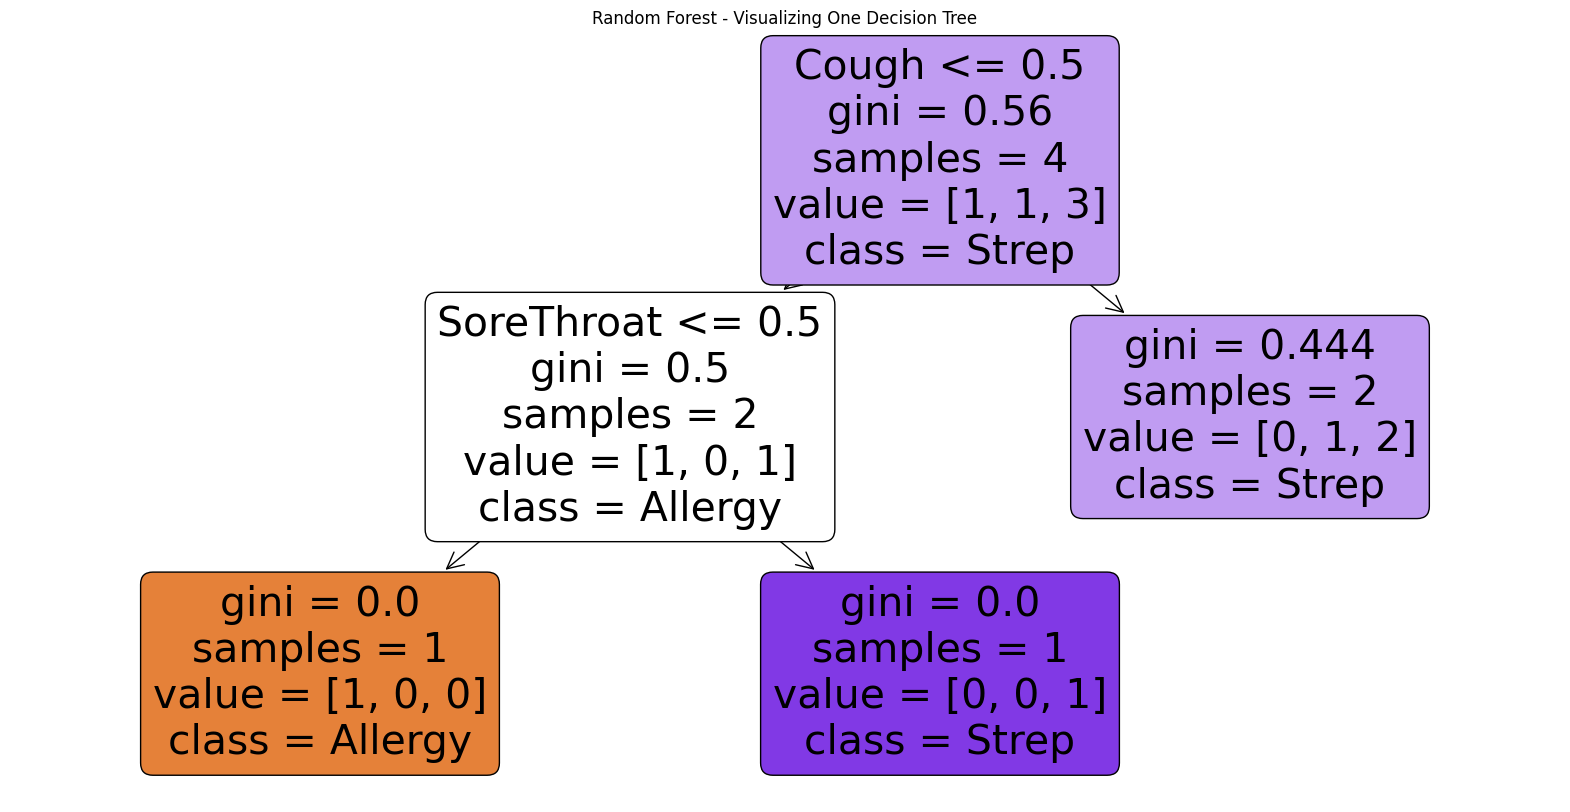

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample dataset with original categorical data
data = {
    'Fever': ['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    'Cough': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
    'SoreThroat': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Diagnosis': ['Flu', 'Infection', 'Cold', 'Allergy', 'Strep', 'Flu', 'Strep', 'Allergy']
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df[['Fever', 'Cough', 'SoreThroat']]
y = df['Diagnosis']

# Convert categorical features to numeric codes
X_encoded = X.apply(lambda col: col.astype('category').cat.codes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Output the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot a single tree from the forest for visualization
plt.figure(figsize=(20, 10))
tree = rf_clf.estimators_[0]  # Visualize the first tree in the forest
plot_tree(tree, feature_names=list(X.columns), class_names=rf_clf.classes_, filled=True, rounded=True)
plt.title("Random Forest - Visualizing One Decision Tree")
plt.show()


# K-Nearest Neighbors (KNN) Classification

In this visualization, we use K-Nearest Neighbors (KNN) to classify a new data point based on its nearest neighbors. The new point is represented by a red star, and the other points represent two distinct classes:

- **Class A (Blue points)**
- **Class B (Green points)**

We explore how the KNN algorithm behaves with different values of K: 3, 5, and 6.

## How KNN Works:
- **K=3**: The algorithm considers the 3 nearest neighbors to classify the new point. In this case, the neighbors are inside the inner black dashed circle.
- **K=5**: When K=5, the purple dashed circle includes 5 nearest neighbors.
- **K=6**: With K=6, the outer black dashed circle is drawn, which includes 6 nearest neighbors for classification.

As we increase the value of K, the algorithm considers more points to make the classification decision. This often leads to smoother decision boundaries but may result in less sensitivity to local patterns.

The circles in the plot represent the neighbor ranges for different K values:
- **Black dashed circle** for K=3
- **Purple dashed circle** for K=5
- **Outer black dashed circle** for K=6

This visual illustrates how the choice of K affects the classification of the new point based on the number of neighbors involved in the decision-making process.


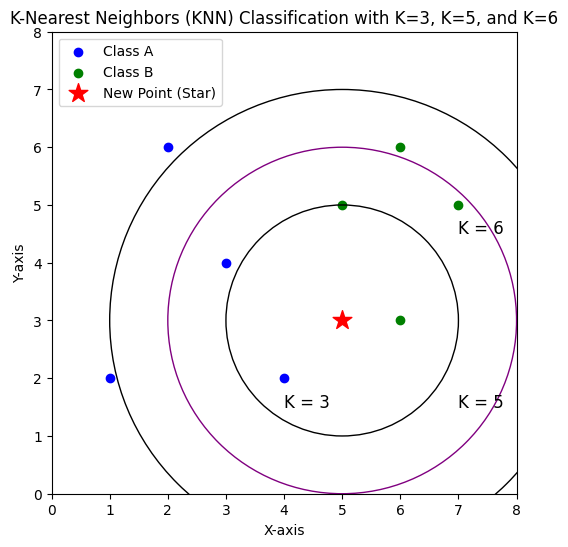

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define the dataset points (features) and their labels
# Blue points (Class A)
X_blue = np.array([[1, 2], [2, 6], [3, 4], [4, 2]])
# Green points (Class B)
X_green = np.array([[6, 6], [5, 5], [6, 3], [7, 5]])

# Combine both sets of points
X = np.vstack((X_blue, X_green))
y = np.array([0]*4 + [1]*4)  # 0 for Class A, 1 for Class B

# The new point we want to classify (red star)
new_point = np.array([[5, 3]])

# Plotting the points
plt.figure(figsize=(6, 6))
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Class A')
plt.scatter(X_green[:, 0], X_green[:, 1], color='green', label='Class B')
plt.scatter(new_point[:, 0], new_point[:, 1], color='red', label='New Point (Star)', marker='*', s=200)

# Create KNN classifiers for k=3, k=5, and k=6
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X, y)

# Predict the class of the new point
predicted_class_3 = knn_3.predict(new_point)
predicted_class_5 = knn_5.predict(new_point)

# Plot the decision boundary circles for k=3, k=5, and k=6
k3_circle = plt.Circle((new_point[0, 0], new_point[0, 1]), radius=2, color='black', fill=False)
k5_circle = plt.Circle((new_point[0, 0], new_point[0, 1]), radius=3, color='purple', fill=False)
k6_circle = plt.Circle((new_point[0, 0], new_point[0, 1]), radius=4, color='black', fill=False)

plt.gca().add_artist(k3_circle)
plt.gca().add_artist(k5_circle)
plt.gca().add_artist(k6_circle)

# Annotate the plot
plt.text(4, 1.5, "K = 3", fontsize=12)
plt.text(7, 1.5, "K = 5", fontsize=12)
plt.text(7, 4.5, "K = 6", fontsize=12)

# Show legend and plot
plt.legend(loc='best')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Nearest Neighbors (KNN) Classification with K=3, K=5, and K=6')

# Show the plot
plt.show()


# Nural Networks

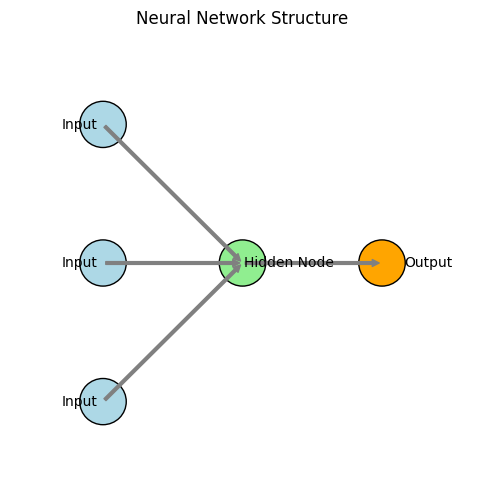

0.2650274005334812

In [2]:
# Modified neural network code with visual representation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Inputs, weights, and bias
inputs = np.array([0.7, -0.3, 1.9])
weights = np.array([0.1, 0.8, -0.5])
bias = 0.1

# Neural network output
weighted_sum = np.dot(inputs, weights) + bias
output = sigmoid(weighted_sum)

# Visualizing the neural network structure (Diagram)
def plot_nn_diagram():
    fig, ax = plt.subplots(figsize=(6, 6))

    # Define positions for nodes
    input_pos = [(0.2, 0.8), (0.2, 0.5), (0.2, 0.2)]  # input layer
    hidden_pos = [(0.5, 0.5)]  # single node in the hidden layer
    output_pos = [(0.8, 0.5)]  # output node

    # Draw input layer nodes
    for pos in input_pos:
        ax.add_patch(plt.Circle(pos, 0.05, color='lightblue', ec='black'))
        ax.text(pos[0] - 0.05, pos[1], "Input", fontsize=10, va='center', ha='center')

    # Draw hidden layer node
    for pos in hidden_pos:
        ax.add_patch(plt.Circle(pos, 0.05, color='lightgreen', ec='black'))
        ax.text(pos[0] + 0.1, pos[1], "Hidden Node", fontsize=10, va='center', ha='center')

    # Draw output layer node
    for pos in output_pos:
        ax.add_patch(plt.Circle(pos, 0.05, color='orange', ec='black'))
        ax.text(pos[0] + 0.1, pos[1], "Output", fontsize=10, va='center', ha='center')

    # Draw arrows from input to hidden layer
    for pos in input_pos:
        ax.add_patch(FancyArrowPatch(pos, hidden_pos[0], color='gray', mutation_scale=10))

    # Draw arrow from hidden to output layer
    ax.add_patch(FancyArrowPatch(hidden_pos[0], output_pos[0], color='gray', mutation_scale=10))

    # Set limits and hide axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.title("Neural Network Structure")
    plt.show()

# Display neural network diagram
plot_nn_diagram()

# Display output of neural network process
output


In [3]:
from sklearn.neural_network import MLPClassifier

# Sample data
X = [[0., 0.], [1., 1.]]
y = [0, 1]

# Creating and training a model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN

# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(None, 1)))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600 (10.16 KB)

 Trainable params: 2,600 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

# Sentiment Analysis using LSTM (Long Short-Term Memory)

## Problem Statement

In this exercise, we are going to perform sentiment analysis on movie reviews using an LSTM-based neural network. Sentiment analysis is a natural language processing (NLP) task where we classify the sentiment of text data (such as positive or negative). The dataset we are using is the **IMDb movie reviews dataset**, which contains 50,000 reviews labeled as either positive or negative.

However, to speed up the training process, we will limit the size of the dataset to a subset of **1,000 samples** from the training and test sets.

### Key Steps:
1. **Data Loading and Preprocessing**: We will load the dataset, limit its size, and preprocess the text data by converting it to numerical sequences (integer-encoded words).
2. **LSTM Model Architecture**: We will build an LSTM model, which includes an embedding layer for word representations, an LSTM layer to capture sequential dependencies, and a dense output layer for binary classification (positive or negative sentiment).
3. **Model Training**: The model will be trained for a few epochs on the smaller dataset to save time.
4. **Sentiment Predictions**: We will decode a few test reviews and predict their sentiment using the trained LSTM model.

## Expected Output

- **Model Summary**: After building the model, we will print a summary that shows the model layers, parameter counts, and layer types.
- **Training Metrics**: We will monitor the accuracy and loss of the model during training and validation.
- **Test Performance**: After training, we will evaluate the model's performance on the test set and print the accuracy and loss values.
- **Sentiment Predictions**: The model will output the sentiment (positive or negative) for a few test sentences, along with the decoded original review text.

For example:
```plaintext
Review 1: i hated this movie but the actor was good
Predicted sentiment: Negative

Review 2: i absolutely loved this film from start to finish
Predicted sentiment: Positive


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load a portion of the IMDb dataset (smaller portion for faster training)
max_features = 10000  # Number of words to consider as features
max_len = 200  # Cut texts after this number of words (for padding/truncating)
sample_size = 1000  # Reducing the dataset size for faster training

# Load the dataset and split it into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Reducing the dataset size for faster training
x_train = x_train[:sample_size]
y_train = y_train[:sample_size]
x_test = x_test[:sample_size]
y_test = y_test[:sample_size]

# Pad sequences to ensure uniform length
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))  # Embedding layer to convert words into dense vectors
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 3

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# Evaluate the model on the test set
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# Function to decode the integer-encoded reviews
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Predict sentiment on a few test sentences
test_sentences = x_test[:5]
predictions = model.predict(test_sentences)

for i, sentence in enumerate(test_sentences):
    print(f"Review {i+1}: {decode_review(sentence)}")
    print(f"Predicted sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}\n")



Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.5561 - loss: 0.6912 - val_accuracy: 0.6280 - val_loss: 0.6809
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.7588 - loss: 0.6228 - val_accuracy: 0.7220 - val_loss: 0.5783
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.8820 - loss: 0.3743 - val_accuracy: 0.7470 - val_loss: 0.5143
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7447 - loss: 0.5291
Test score: 0.5143289566040039
Test accuracy: 0.746999979019165
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Review 1: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat f

In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00


# Graph Convolutional Network (GCN) on the Cora Dataset

## Overview
This document explains the process of setting up a Graph Convolutional Network (GCN) to work with a subset of the Cora dataset, a commonly used benchmark in graph neural network research. The Cora dataset comprises scientific publications as nodes and citations between them as edges, classified into different categories.

## Steps and Code Explanation

### 1. Loading the Dataset
The Cora dataset is loaded using PyTorch Geometric's `Planetoid` dataset class. This dataset includes several node features for each publication and the citation links between them.

### 2. Selecting a Subset of Nodes
For this demonstration, 100 nodes are randomly selected to simplify the visualization and computation. This selection is crucial for handling large datasets in manageable, illustrative chunks.

### 3. Creating a Subgraph
A subgraph is created using the selected nodes. This subgraph retains only the edges that exist between the chosen nodes. The `subgraph` utility from PyTorch Geometric is used to facilitate this, which ensures that only relevant nodes and edges are included in the model training and visualization.

### 4. GCN Model Definition
A simple GCN model is defined with two convolutional layers using PyTorch Geometric’s `GCNConv` module. This model is designed to process node features and capture the dependencies via the edges by aggregating neighbor features at each layer.

### 5. Training the GCN Model
The model is trained on the node features and the citation link structure provided in the subgraph. The training involves running multiple epochs, adjusting weights to minimize the loss, which is the difference between predicted and actual class labels of the nodes.

### 6. Visualization of the Subgraph
The subgraph is visualized using NetworkX and Matplotlib, showing how nodes (publications) are interconnected. The visualization helps in understanding the immediate neighborhood structure around each node, essential for grasping how GCN aggregates features across the network.

## Outputs

### Graph Visualization
The graph of selected nodes is displayed, highlighting the connections (citations) between them. Nodes are represented as points, and edges are shown as lines between them, which illustrates how closely various publications are related in terms of citations.

### Model Accuracy
Post-training, the accuracy of the GCN model is computed, showing how well the model has learned to classify the nodes based on the features and the citation network.

### Aggregation Visualization
To further explain the concept of feature aggregation in GCNs, a specific node and its neighbors are highlighted. This showcases how each node in a GCN collects feature information from its immediate neighbors, crucial for learning accurate node representations.

## Conclusion
This exercise demonstrates the capability of GCNs to effectively process graph-structured data by leveraging both node features and graph topology. The approach shown here is fundamental in various applications like social network analysis, recommendation systems, and more, where data is inherently structured as graphs.


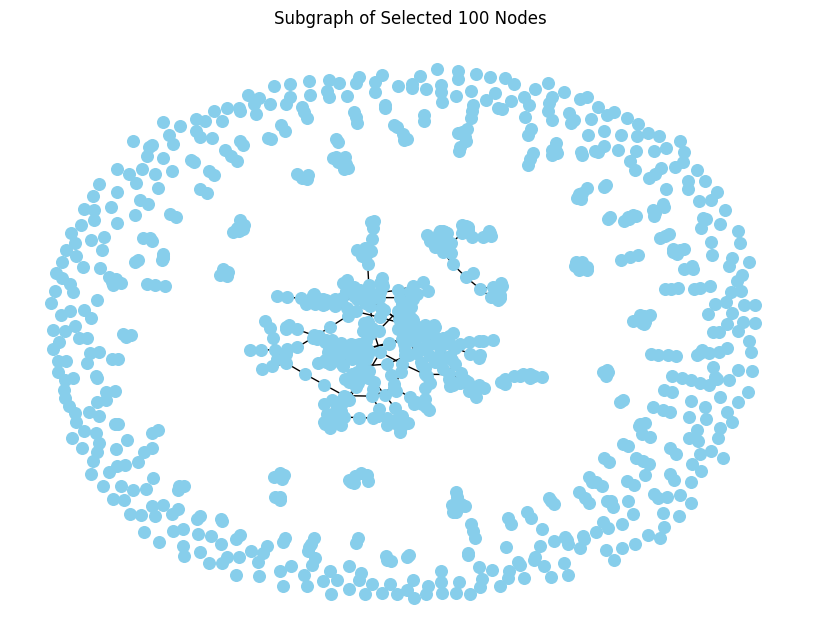

Accuracy: 9.7100


In [11]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx, subgraph
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]  # Get the first graph object

# Select 100 nodes randomly
np.random.seed(42)  # For reproducibility
selected_nodes = np.random.choice(data.num_nodes, 1000, replace=False)

# Create subgraph with these nodes
node_mask = torch.tensor(selected_nodes, dtype=torch.long)
sub_data_edge_index, edge_mask = subgraph(node_mask, data.edge_index, num_nodes=data.num_nodes, relabel_nodes=True)
sub_data = data.clone()  # Clone the data object to retain other data attributes
sub_data.edge_index = sub_data_edge_index
sub_data.x = data.x[selected_nodes]
sub_data.y = data.y[selected_nodes]

# Convert to NetworkX graph for visualization
G = to_networkx(sub_data, to_undirected=True)

# Plot the subgraph of selected nodes
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=70, node_color="skyblue", with_labels=False)
plt.title("Subgraph of Selected 100 Nodes")
plt.show()

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
sub_data = sub_data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(sub_data)
    loss = F.nll_loss(out, sub_data.y)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
_, pred = model(sub_data).max(dim=1)
correct = pred.eq(sub_data.y).sum().item()
accuracy = correct / 100
print(f'Accuracy: {accuracy:.4f}')



# Machine Learning Model Evaluation with Synthetic Data

This notebook explores the application of various machine learning models to two types of problems: classification and regression. The aim is to understand model performance across different metrics and visualize their effectiveness using synthetic data sets.

## Classification: Disease Status Prediction

**Objective**: Predict the disease status of individuals based on health indicators, classified into three categories: Healthy, Pre-Disease, and Disease.

### Models Used for Classification:
- **K-Nearest Neighbors (KNN)**: A simple, distance-based algorithm suitable for small datasets.
- **Decision Tree Classifier**: A model that partitions the space into regions having the same class labels.
- **Convolutional Neural Network (CNN)**: Typically used for grid-like data such as images but can be adapted for sequence data by treating feature vectors as one-dimensional images.

### Metrics for Classification:
- **Accuracy**: The proportion of true results among the total number of cases examined.
- **Precision**: The proportion of true positive identifications.
- **Recall**: The ability of the model to find all relevant cases (sensitivity).
- **F1-Score**: A weighted average of Precision and Recall.

### Confusion Matrix:
A table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows easier visualization of the performance of an algorithm.



## Implementation Steps:
1. **Data Generation**: Create synthetic datasets using `make_classification` for categorical data and `make_regression` for continuous data.
2. **Data Preprocessing**: Scale


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


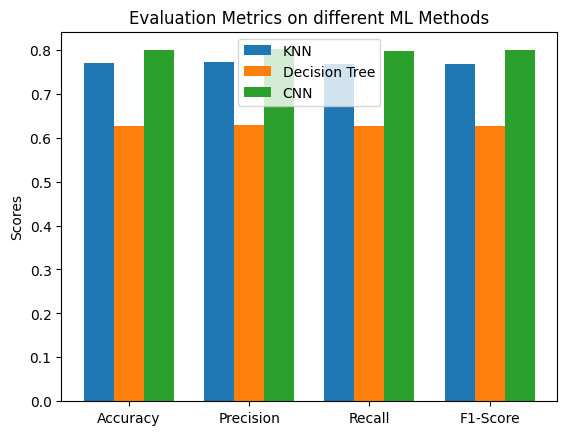

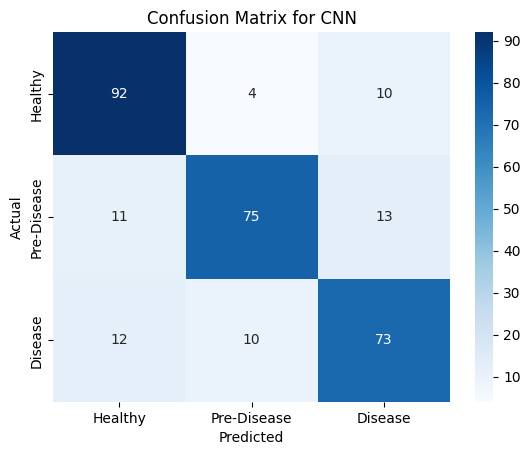

Linear Regression RMSE: 19.42
Linear Regression MAE: 15.76


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical

# Function to evaluate classification models
def evaluate_classification_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Generate synthetic data for classification (Medical Diagnostic)
X_class, y_class = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=3, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Generate synthetic data for regression (House Pricing)
X_reg, y_reg = make_regression(n_samples=1000, n_features=4, n_informative=2, noise=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Scaling features for CNN
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_class_scaled = X_train_class_scaled.reshape(X_train_class_scaled.shape[0], X_train_class_scaled.shape[1], 1)
X_test_class_scaled = X_test_class_scaled.reshape(X_test_class_scaled.shape[0], X_test_class_scaled.shape[1], 1)

# Models
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_class, y_train_class)
knn_pred = knn.predict(X_test_class)
knn_metrics = evaluate_classification_model(y_test_class, knn_pred)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_class, y_train_class)
dt_pred = dt.predict(X_test_class)
dt_metrics = evaluate_classification_model(y_test_class, dt_pred)

# CNN Classifier
cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(20, 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_class_scaled, to_categorical(y_train_class), epochs=10, verbose=0)
cnn_pred = np.argmax(cnn.predict(X_test_class_scaled), axis=-1)
cnn_metrics = evaluate_classification_model(y_test_class, cnn_pred)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
lr_pred = lr.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, lr_pred))
mae = mean_absolute_error(y_test_reg, lr_pred)

# Bar chart for classification metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = list(knn_metrics)
dt_scores = list(dt_metrics)
cnn_scores = list(cnn_metrics)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, knn_scores, width, label='KNN')
rects2 = ax.bar(x, dt_scores, width, label='Decision Tree')
rects3 = ax.bar(x + width, cnn_scores, width, label='CNN')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics on different ML Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Confusion Matrix for CNN
cm = confusion_matrix(y_test_class, cnn_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Healthy', 'Pre-Disease', 'Disease'], yticklabels=['Healthy', 'Pre-Disease', 'Disease'])
plt.title('Confusion Matrix for CNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print regression metrics
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression MAE: {mae:.2f}")


# House Price Estimation Using Regression Analysis

This notebook demonstrates the application of regression techniques to estimate house prices based on synthetic data. We compare two different models: Linear Regression and a 1D Convolutional Neural Network (CNN) designed for continuous value prediction.

## Objective
To estimate house prices using features such as size, number of rooms, and location rating, and evaluate the performance of Linear Regression and CNN models on this task.

## Models Overview
- **Linear Regression**: This model predicts a dependent variable (house prices) by fitting a linear equation to observed data. It's a fundamental model for regression tasks.
- **1D Convolutional Neural Network (CNN)**: Although traditionally used for image processing, CNNs can be adapted for regression tasks. Here, we treat feature vectors as one-dimensional "images," allowing the CNN to capture spatial hierarchies in data.

## Metrics Used for Evaluation
- **Root Mean Squared Error (RMSE)**: Represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. This metric gives an idea of how much error the system typically makes in its predictions.
- **Mean Absolute Error (MAE)**: An average of the absolute differences between the predictions and actual observations. It provides an idea of how big of an error you can expect from the forecast on average.

## Data Generation
Synthetic data is generated using the `make_regression` function from Scikit-learn, tailored to simulate real-world data with three informative features and noise.

## Data Preprocessing
Data is scaled using `StandardScaler` to normalize the feature distribution, making it suitable for neural network training.

## Model Training and Evaluation
Both models are trained on the scaled training dataset, and predictions are made on the test set. The performance of the models is evaluated using RMSE and MAE to understand their accuracy and reliability.

## Visualization
- The first plot visually compares the predictions made by both models against the actual house prices, providing a direct visual assessment of each model's prediction accuracy.
- The second plot is a bar chart comparing the RMSE and MAE of both models, providing a clear numerical comparison of their performance.

## Conclusion
This analysis helps in understanding how different models perform on the same regression task and guides in selecting the appropriate model based on the error metrics and specific use cases in real estate price prediction.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


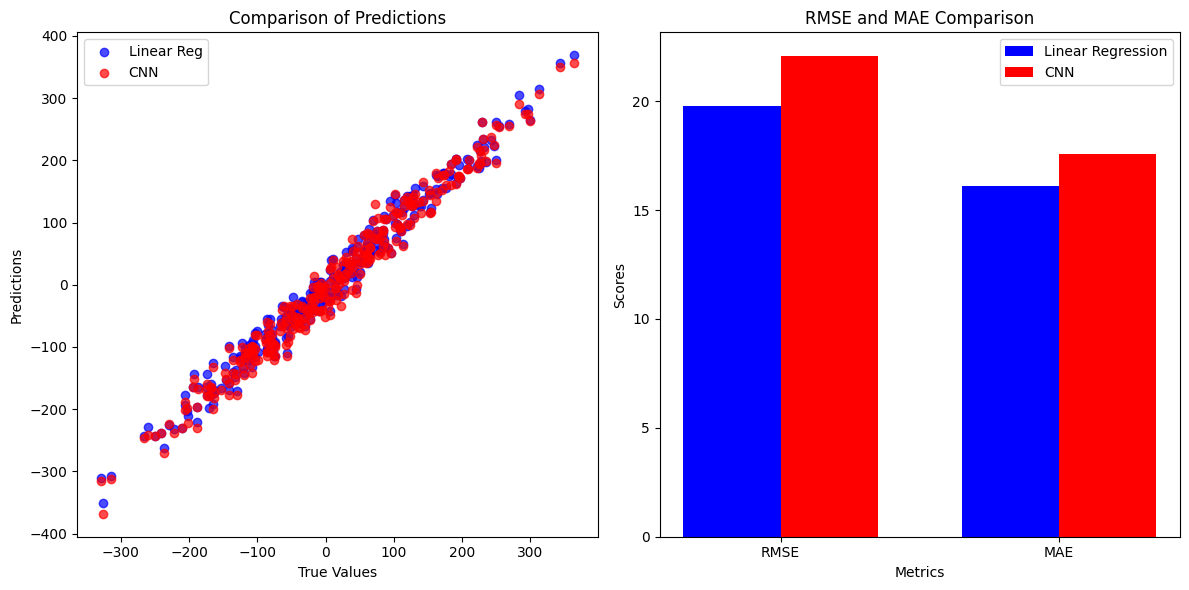

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=42)
y = y.reshape(-1, 1)  # Reshape for compatibility with CNN input

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for neural network consistency
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# 1D CNN for Regression
cnn = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
cnn.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
cnn.fit(X_train_scaled.reshape(-1, 3, 1), y_train_scaled, epochs=100, verbose=0)
y_pred_cnn = cnn.predict(X_test_scaled.reshape(-1, 3, 1))
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn)  # Inverse transform to get actual values

rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Linear Reg')
plt.scatter(y_test, y_pred_cnn, alpha=0.7, color='red', label='CNN')
plt.title('Comparison of Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.subplot(1, 2, 2)
bar_width = 0.35
index = np.arange(2)
bar1 = plt.bar(index, [rmse_lr, mae_lr], bar_width, label='Linear Regression', color='b')
bar2 = plt.bar(index + bar_width, [rmse_cnn, mae_cnn], bar_width, label='CNN', color='r')
plt.title('RMSE and MAE Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(index + bar_width / 2, ('RMSE', 'MAE'))
plt.legend()

plt.tight_layout()
plt.show()


# Comparing Holdout and 5-Fold Cross-Validation in Linear Regression

This analysis focuses on comparing the effectiveness of the holdout method versus 5-fold cross-validation in estimating the performance of a Linear Regression model. We use a synthetic dataset to measure the Root Mean Squared Error (RMSE) for both validation methods.

## Overview of Methods

### Holdout Method
- **Data Splitting**: The dataset is divided into training and testing sets, with 80% used for training and 20% reserved for testing.
- **Evaluation**: After training the Linear Regression model on the training set, predictions are made on the test set, and RMSE is calculated to evaluate the model's accuracy.

### 5-Fold Cross-Validation
- **Multiple Splits**: The dataset is split into five parts, each serving as a test set while the remaining four parts serve as training data, rotating through all parts.
- **Evaluation Consistency**: RMSE is calculated for each fold, and an average RMSE is computed to assess overall model performance across different subsets of data.

## Comparison Objectives

- **Model Reliability**: Assessing how consistently the model performs across different splits of data, which is crucial in understanding model stability.
- **Performance Insight**: Gaining deeper insights into model behavior by comparing its performance in a single, static split (holdout) versus multiple, dynamic splits (cross-validation).

## Results

- **Visualization**: RMSE values from the holdout test set and each of the five cross-validation folds are visualized in a bar chart to directly compare their magnitudes.
- **Interpretation**: This visual comparison helps identify any significant variations in model performance that could indicate overfitting or inconsistencies in model training with different data subsets.

By closely examining these two approaches, we aim to highlight the benefits and potential drawbacks of each, providing a clear basis for choosing the appropriate evaluation strategy depending on specific model requirements and data characteristics.


RMSE on Test Data (Holdout Method): 20.29
RMSE for Fold 1: 21.01
RMSE for Fold 2: 18.11
RMSE for Fold 3: 21.65
RMSE for Fold 4: 18.78
RMSE for Fold 5: 19.37
Average RMSE across 5-Fold Cross-Validation: 19.78


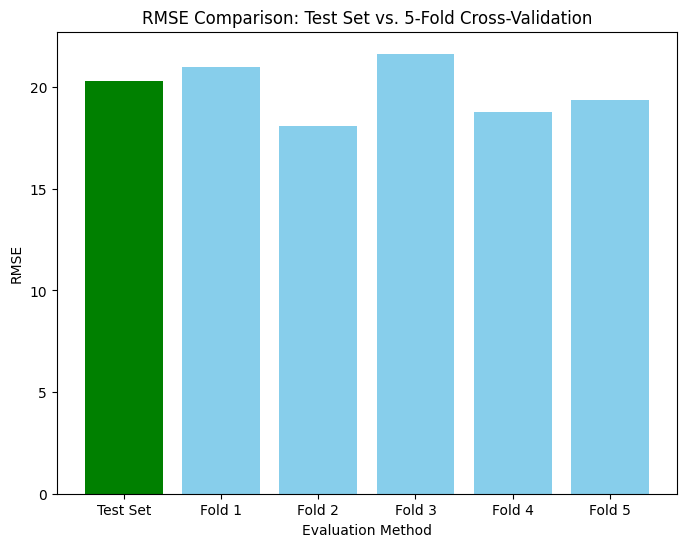

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=42)
y = y.reshape(-1, 1)  # Reshape for compatibility with Linear Regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on Test Data (Holdout Method): {rmse_test:.2f}')

# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_rmse_average = np.mean(cv_rmse_scores)

# Print RMSE for each fold
for i, score in enumerate(cv_rmse_scores, 1):
    print(f'RMSE for Fold {i}: {score:.2f}')
print(f'Average RMSE across 5-Fold Cross-Validation: {cv_rmse_average:.2f}')

# Create a bar plot to compare RMSE
plt.figure(figsize=(8, 6))
bars = plt.bar(range(6), [rmse_test] + list(cv_rmse_scores), color=['green'] + ['skyblue'] * 5)
plt.xticks(range(6), ['Test Set'] + [f'Fold {i}' for i in range(1, 6)])
plt.xlabel('Evaluation Method')
plt.ylabel('RMSE')
plt.title('RMSE Comparison: Test Set vs. 5-Fold Cross-Validation')
plt.show()

